In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

## ROC Curve i AUC

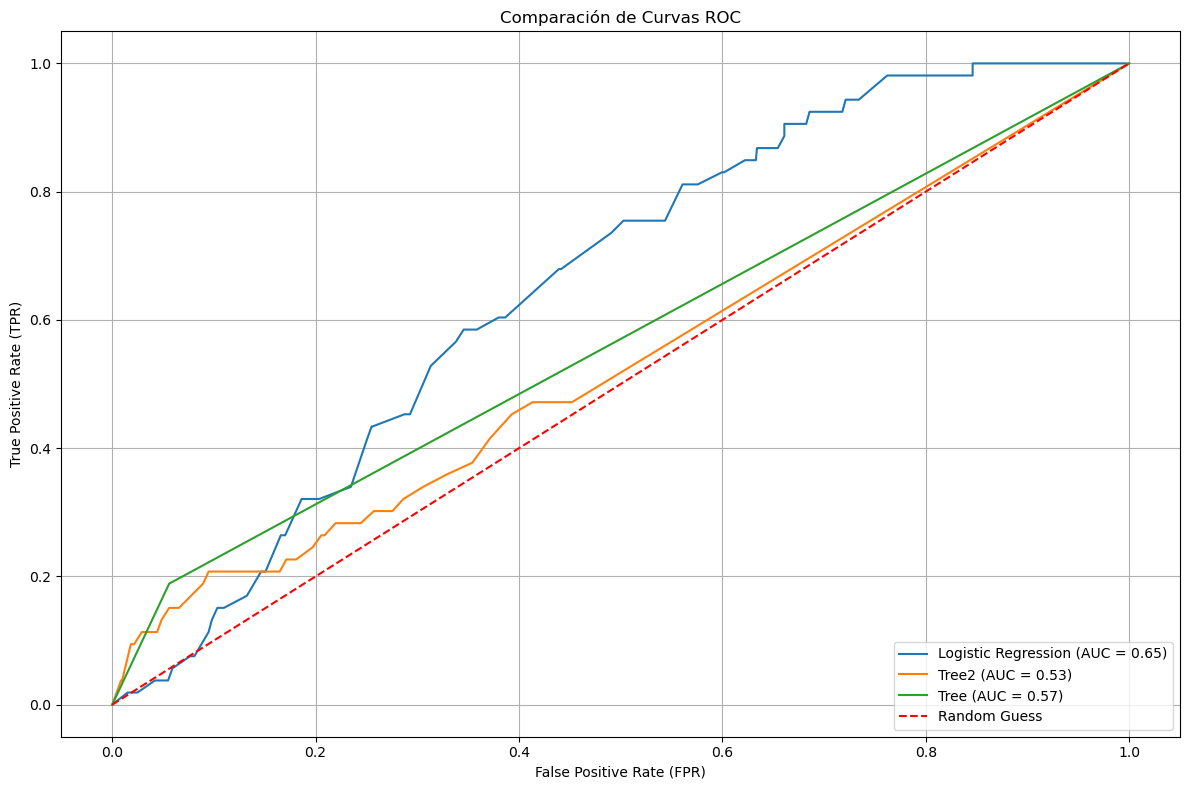

In [9]:
output_dir="ROC_Data"

if not os.path.exists(output_dir):
    print("La carpeta no existeix")

# Buscar los archivos correspondientes a FPR y TPR de cada modelo
roc_files = [f for f in os.listdir(output_dir) if f.endswith('_fpr.npy')]
if not roc_files:
    print("No s'han trobat.")

plt.figure(figsize=(12, 8))
for roc_file in roc_files:
    #Nom del model 
    model_name = roc_file.replace('_fpr.npy', '')

    #Carregar les dades
    fpr = np.load(os.path.join(output_dir, f"{model_name}_fpr.npy"))
    tpr = np.load(os.path.join(output_dir, f"{model_name}_tpr.npy"))
    auc = np.load(os.path.join(output_dir, f"{model_name}_auc.npy"))[0]

    #Afegir la corba al gràfic
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})")

#Afegir la línea aleatòria
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')

plt.title('Comparación de Curvas ROC')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.show()


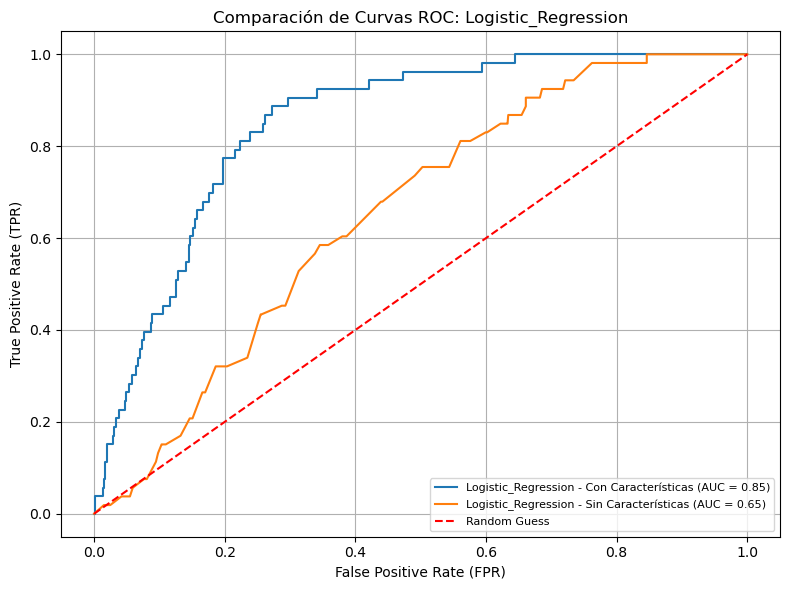

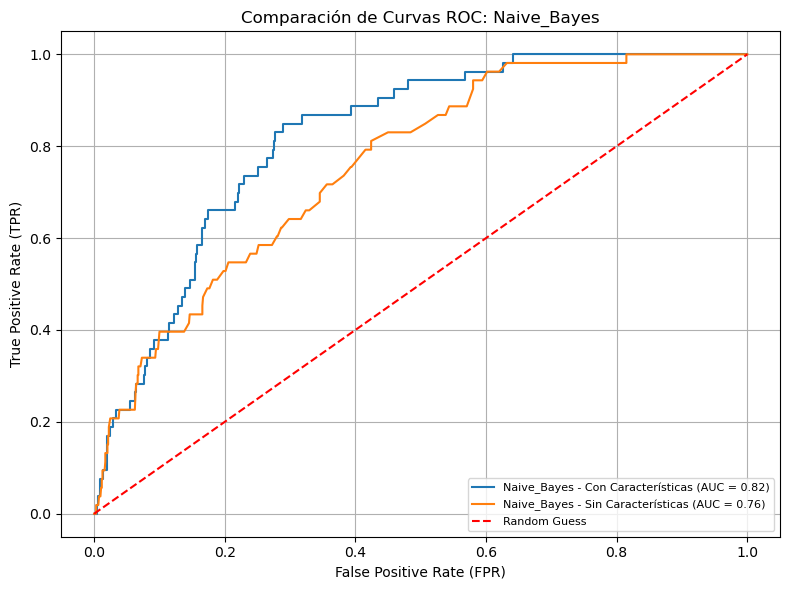

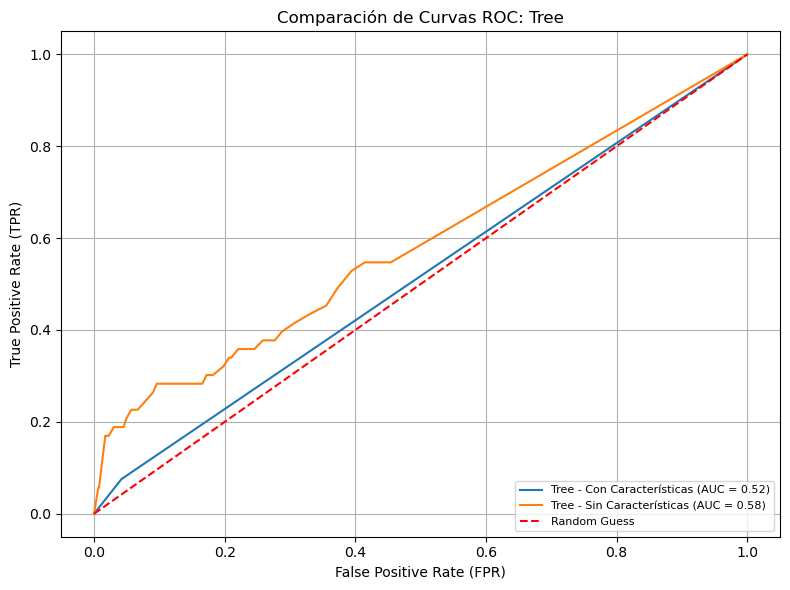

In [7]:
output_dir = "ROC_Data"

roc_files_full = [f for f in os.listdir(output_dir) if f.endswith('_full_fpr.npy')]
roc_files_reduced = [f for f in os.listdir(output_dir) if f.endswith('_reduced_fpr.npy')]

if not roc_files_full or not roc_files_reduced:
    print("No s'han trobat els arxius de les corbes ROC.")

# Iterar sobre tots els models
for model_file_full in roc_files_full:
    # Nom del model 
    model_name = model_file_full.replace('_full_fpr.npy', '')

    if f"{model_name}_reduced_fpr.npy" not in roc_files_reduced:
        print(f"No s'ha trobat la versió reduïda per al model {model_name}. Saltant model.")
        continue

    fpr_full = np.load(os.path.join(output_dir, f"{model_name}_full_fpr.npy"))
    tpr_full = np.load(os.path.join(output_dir, f"{model_name}_full_tpr.npy"))
    auc_full = np.load(os.path.join(output_dir, f"{model_name}_full_auc.npy"))[0]
    
    fpr_reduced = np.load(os.path.join(output_dir, f"{model_name}_reduced_fpr.npy"))
    tpr_reduced = np.load(os.path.join(output_dir, f"{model_name}_reduced_tpr.npy"))
    auc_reduced = np.load(os.path.join(output_dir, f"{model_name}_reduced_auc.npy"))[0]

    # Crear el gràfic
    plt.figure(figsize=(8, 6))

    # Model amb totes les característiques
    plt.plot(fpr_full, tpr_full, label=f"{model_name} - Con Características (AUC = {auc_full:.2f})")
    
    # Model reduit
    plt.plot(fpr_reduced, tpr_reduced, label=f"{model_name} - Sin Características (AUC = {auc_reduced:.2f})")

    # Línia aleatòria
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')

    plt.title(f'Comparación de Curvas ROC: {model_name}')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend(loc='lower right', fontsize=8)
    plt.grid()

    # Guardar el plot com una imatge
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f'ROC_comparison_{model_name}.png'))

    plt.show()
